In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("data/expenses.csv")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      10 non-null     object
 1   category  10 non-null     object
 2   amount    10 non-null     int64 
 3   type      10 non-null     object
dtypes: int64(1), object(3)
memory usage: 452.0+ bytes


In [5]:
df['date'] = pd.to_datetime(df['date'])
df = df[df['amount'] > 0]


In [6]:
df.isnull().sum()


date        0
category    0
amount      0
type        0
dtype: int64

In [7]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
expenses = df[df['type'] == 'Expense']
income = df[df['type'] == 'Income']


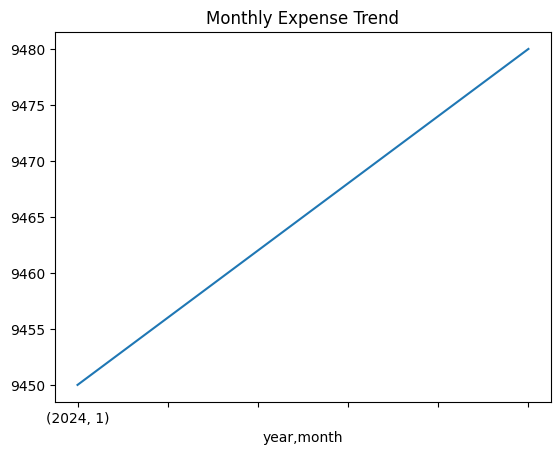

In [18]:
monthly_expense = expenses.groupby(['year','month'])['amount'].sum()
monthly_expense.plot()
plt.title("Monthly Expense Trend")
plt.show()

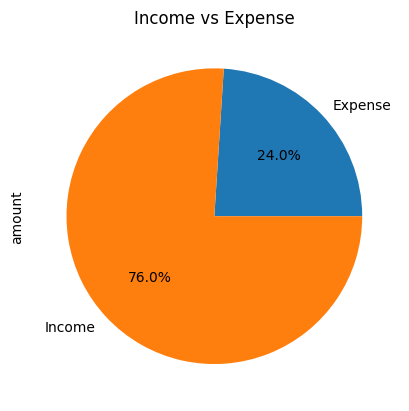

In [9]:
df.groupby('type')['amount'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title("Income vs Expense")
plt.show()


In [10]:
budget = 15000
monthly_total = expenses.groupby(['year','month'])['amount'].sum()

monthly_total


year  month
2024  1        9450
      2        9480
Name: amount, dtype: int64

In [11]:
monthly_total > budget


year  month
2024  1        False
      2        False
Name: amount, dtype: bool

In [12]:
ml_data = monthly_total.reset_index()
X = ml_data[['month']]
y = ml_data['amount']


In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
next_month = pd.DataFrame({'month': [3]})
model.predict(next_month)



array([9510.])

In [16]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
rmse


np.float64(0.0)